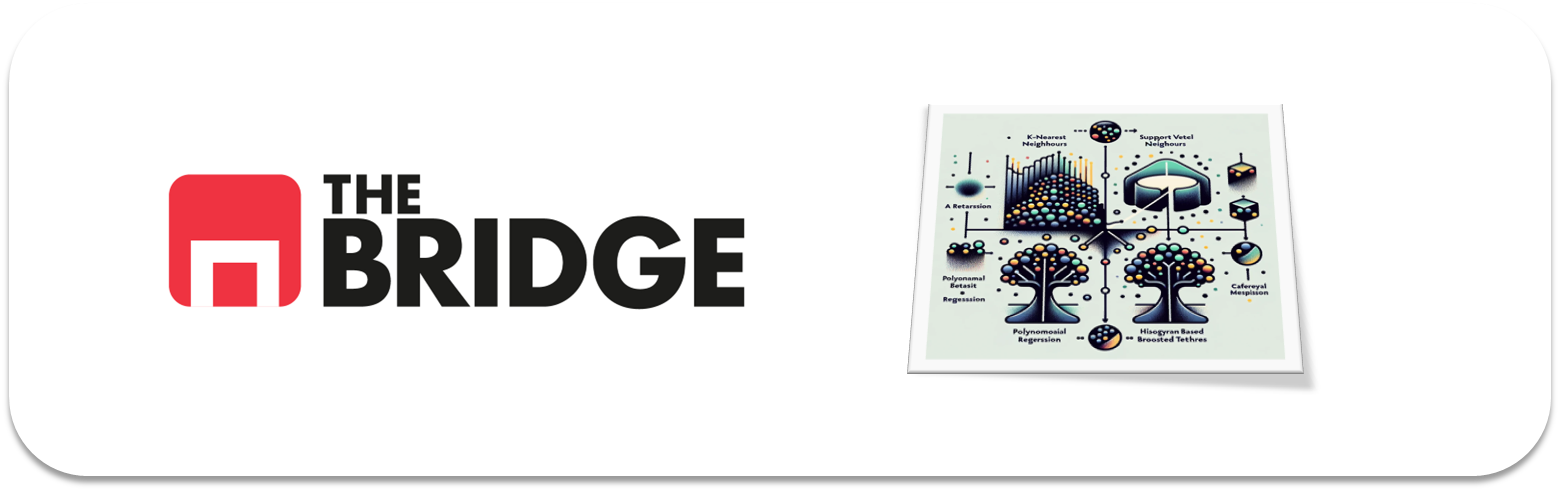

## PRACTICA OBLIGATORIA: **Otros Modelos Supervisados**

* La práctica obligatoria de esta unidad consiste en resolver un modelado de clasificación, incluyendo KNN entre los posibles modelos, y aplicando balanceado. Para ello utilizaremos un dataset que ya hemos empleado en los workout. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [1]:
import bootcampviztools as bt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

### #1. El problema y los datos

Vamos a volver al dataset con el que vimos la clasificación binaria con regresión logística, "Give me some credit", y nuestro objetivo es crear un modelo que nos permita predicir **si una persona va a encontrarse en dificultades financieras en los dos próximos años**. El dataset de partida lo puedes en contrar en el directorio data que acompaña al ejercicio. 

### #1.1
Cárgalo y, apoyándote en las herramientas y fuentes que consideres necesarias, haz una descripción textual de sus variables. Luego con ayuda de los datos, haz una clasificación inicial de sus variables en categóricas y numéricas.


 - **SeriousDlqin2yrs**: indica si la persona tuvo un impago grave en los próximos 2 años (1 = sí, 0 = no). Es la variable target.

 - **RevolvingUtilizationOfUnsecuredLines**: tasa de utilización de crédito no garantizado (proporción entre saldo de deuda y crédito disponible).

 - **age** : edad de quien solicita el préstamo

 - **NumberOfTime30-59DaysPastDueNotWorse**: número de veces que se he retrasado entre 30-59 días en el pago

 - **DebtRatio**: ratio de deuda

 - **MonthlyIncome** : ingreso mensual

 - **NumberOfOpenCreditLinesAndLoans**: número de préstamos y líneas de crédito abiertas

 - **NumberOfTimes90DaysLate**: número de veces que se ha retrasado 90 días en pagar

 - **NumberRealEstateLoansOrLines**: cantidad de préstamos inmobiliaros 

 - **NumberOfTime60-89DaysPastDueNotWorse**: número de veces que se ha retrasado entre 60-89 días en el pago

 - **NumberOfDependents**: número de personas que dependen económicamente del solicitante.

In [2]:
df = pd.read_csv("./data/credit_npo.csv")
df.head(20)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.081892,37,0,0.070709,5656.0,12,1,0,0,0.0
1,0,0.023413,74,0,0.209197,4870.0,9,0,1,0,0.0
2,0,0.000000,43,0,0.080784,5000.0,2,0,0,0,2.0
3,0,0.492754,44,0,0.412735,7333.0,4,0,2,0,3.0
4,0,1.000000,63,0,0.000000,8333.0,3,0,0,0,1.0
5,0,0.101002,61,0,0.217115,15880.0,5,0,1,0,0.0
6,0,0.222830,60,0,0.907083,1312.0,5,0,0,0,0.0
7,0,0.353443,39,0,0.764309,4000.0,11,0,1,0,2.0
8,0,0.772455,45,0,0.387179,5100.0,5,0,1,0,3.0
9,0,0.116165,44,0,0.160236,10833.0,8,0,1,0,0.0


In [3]:
list_col = df.columns.tolist()
print("Nombres de las columnas en el DataFrame 'Give me some credit':\n", list_col)

Nombres de las columnas en el DataFrame 'Give me some credit':
 ['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age', 'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents']


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12537 entries, 0 to 12536
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      12537 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  12537 non-null  float64
 2   age                                   12537 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  12537 non-null  int64  
 4   DebtRatio                             12537 non-null  float64
 5   MonthlyIncome                         11816 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       12537 non-null  int64  
 7   NumberOfTimes90DaysLate               12537 non-null  int64  
 8   NumberRealEstateLoansOrLines          12537 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  12537 non-null  int64  
 10  NumberOfDependents                    12360 non-null  float64
dtypes: float64(4), 

In [5]:
df.isna().sum()

SeriousDlqin2yrs                          0
RevolvingUtilizationOfUnsecuredLines      0
age                                       0
NumberOfTime30-59DaysPastDueNotWorse      0
DebtRatio                                 0
MonthlyIncome                           721
NumberOfOpenCreditLinesAndLoans           0
NumberOfTimes90DaysLate                   0
NumberRealEstateLoansOrLines              0
NumberOfTime60-89DaysPastDueNotWorse      0
NumberOfDependents                      177
dtype: int64

In [6]:
display(df["MonthlyIncome"].mode())
display(df["NumberOfDependents"].mode())

0    5000.0
Name: MonthlyIncome, dtype: float64

0    0.0
Name: NumberOfDependents, dtype: float64

In [7]:
# Copia del DF
df_copia = df.copy()

# Imputamos valores nulos con la moda
df.loc[df["MonthlyIncome"].isna(), "MonthlyIncome"] = df["MonthlyIncome"].mode()
df.loc[df["NumberOfDependents"].isna(), "NumberOfDependents"] = df["NumberOfDependents"].mode()

In [8]:
# Comprobación
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12537 entries, 0 to 12536
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      12537 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  12537 non-null  float64
 2   age                                   12537 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  12537 non-null  int64  
 4   DebtRatio                             12537 non-null  float64
 5   MonthlyIncome                         11816 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       12537 non-null  int64  
 7   NumberOfTimes90DaysLate               12537 non-null  int64  
 8   NumberRealEstateLoansOrLines          12537 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  12537 non-null  int64  
 10  NumberOfDependents                    12360 non-null  float64
dtypes: float64(4), 

In [9]:
df["SeriousDlqin2yrs"].value_counts()

SeriousDlqin2yrs
0    11673
1      864
Name: count, dtype: int64

Son todas variables numéricas a ecepción del target es una variable binaria categórica.

### #1.2
¿Qué tipo de problema estamos tratando? ¿Cuál es la variable target?

Nos encontramos ante un problema de clasificación.

La variable target es `SeriousDlqin2yrs`

### #1.3
Pinta la distribución de frecuencias del target y coméntala

In [10]:
# Variable objetivo
target = y = df["SeriousDlqin2yrs"]

# Features
X = df.drop(columns="SeriousDlqin2yrs")
features = X.columns.tolist()
print("Features:\n", features)

Features:
 ['RevolvingUtilizationOfUnsecuredLines', 'age', 'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents']


In [11]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size= 0.2, 
                                                    random_state= 42)

# Comprobación
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (10029, 10)
Test shape: (2508, 10)


Proporción de clases: 


 SeriousDlqin2yrs
0    0.931084
1    0.068916
Name: proportion, dtype: float64


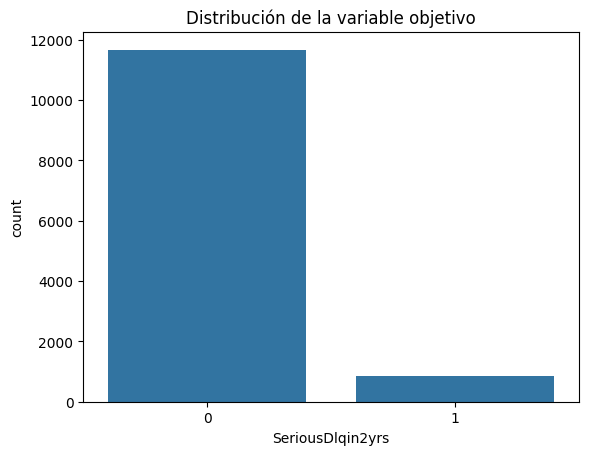

In [12]:
# Visualización de la distribución del target antes del TTP
sns.countplot(x = "SeriousDlqin2yrs" , data = df)
plt.title("Distribución de la variable objetivo")
plt.show

# Proporciones
print("Proporción de clases: \n", target.value_counts(normalize=True))

Proporción de clases: 
 SeriousDlqin2yrs
0    0.930103
1    0.069897
Name: proportion, dtype: float64


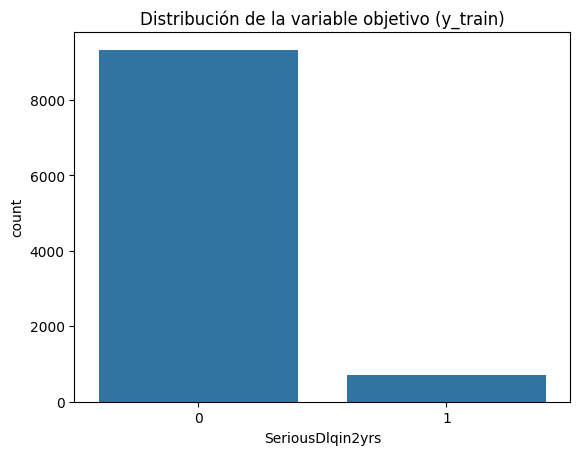

In [13]:
# Unión de X_train e y_train para facilitar el análisis conjunto
df_train = X_train.copy()
df_train["SeriousDlqin2yrs"] = y_train

# Visualización de la distribución del target
sns.countplot(x = "SeriousDlqin2yrs", data = df_train)
plt.title("Distribución de la variable objetivo (y_train)")
plt.show

# Proporciones
print("Proporción de clases: \n", y_train.value_counts(normalize=True))

Se trata de un target extremadamente desequilibrado hacia los clientes que no muestran una de delincuencias fuertes en los últimos 2 años.

### #2 Modelado

Realiza un proceso completo de modelado hasta dar con el mejor modelo de los que hayas escogido (emplea al menos 3, y uno tiene que ser KNN). Aplica las técnicas que creas necesarias para obtener el mejor resultado (suponiendo que este después de hablar con el negocio es el recall medio, para tener un compromiso entre las dos clases). Para comparar modelos emplea validación cruzada antes de optimización y luego ajusta los hiperparámetros del mejor modelo. Evalúa este y haz un pequeño análisis de errores.

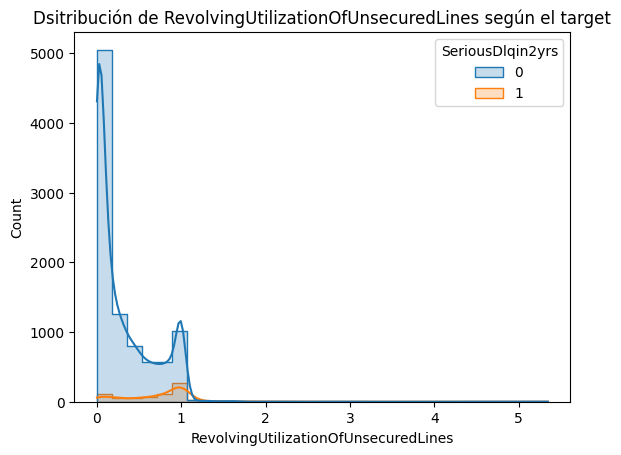

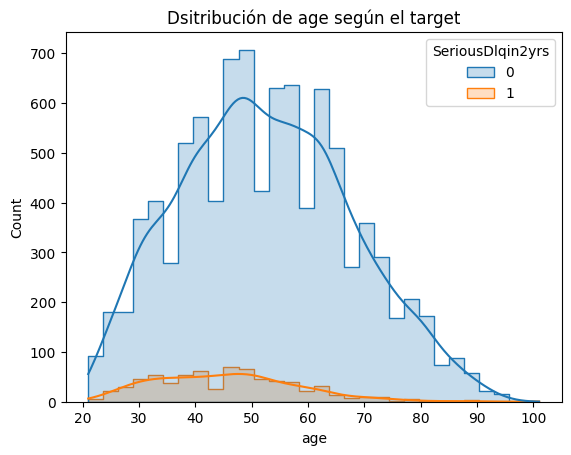

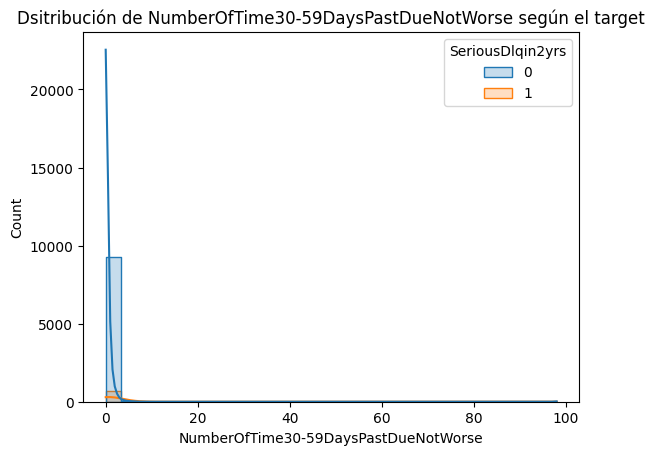

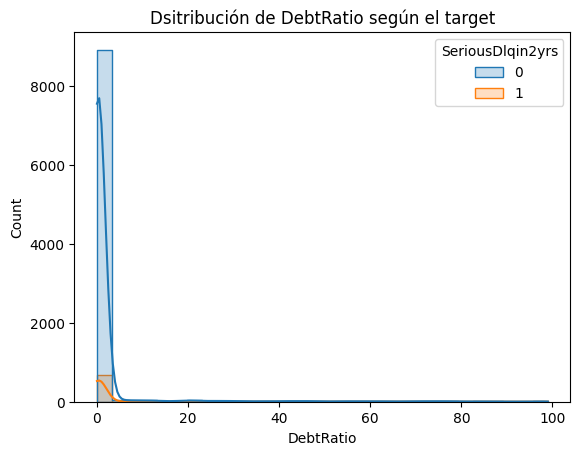

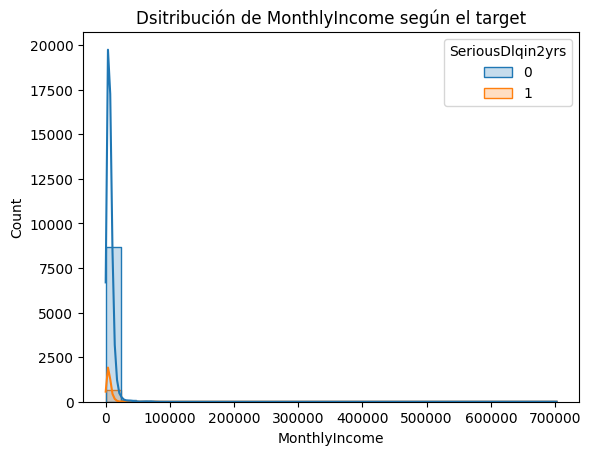

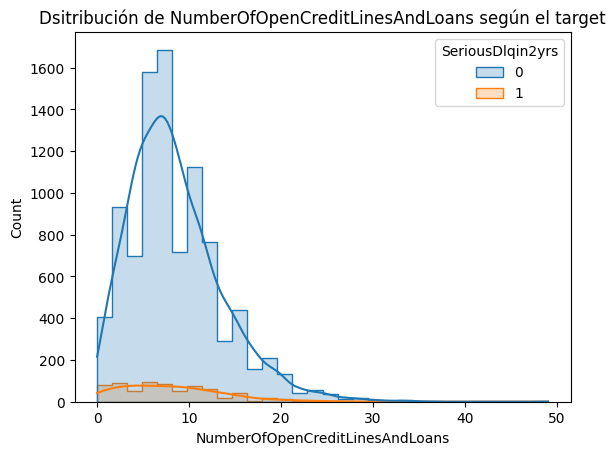

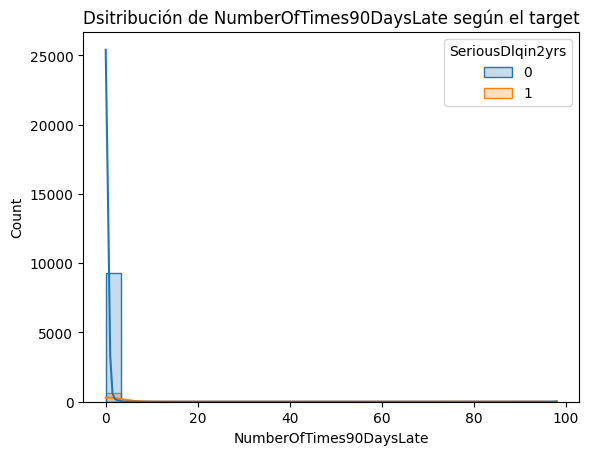

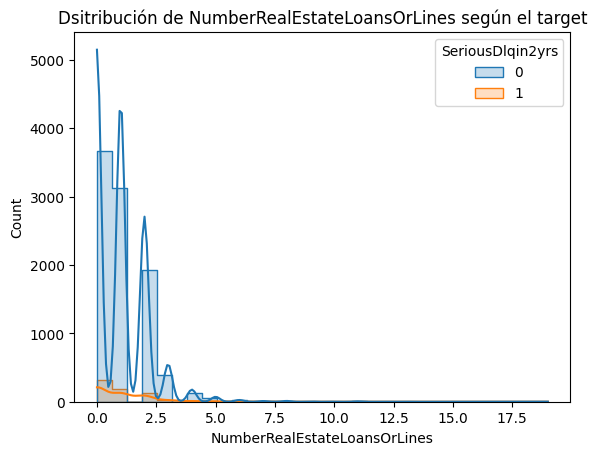

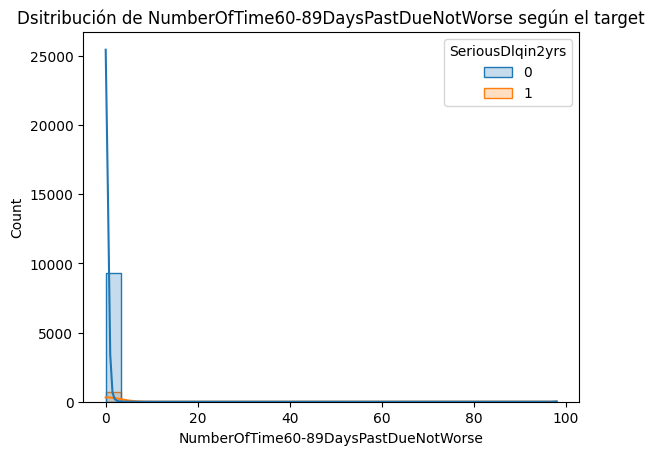

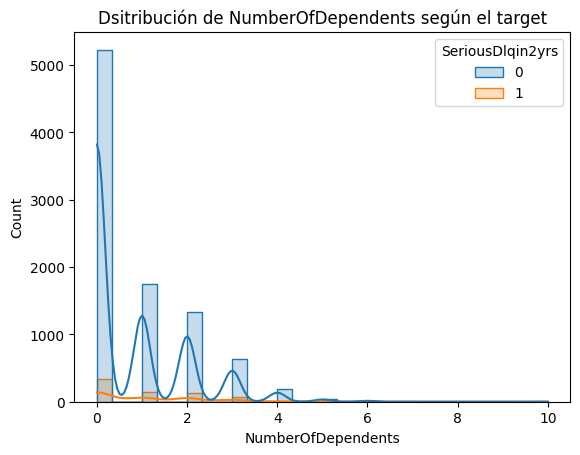

In [14]:

# Análisi de relación de variables respecto al target
for col in features:
    sns.histplot(data = df_train, x = col, hue = y_train, bins = 30, kde = True, element= "step")
    plt.title(f"Dsitribución de {col} según el target")
    plt.show()

array([[<Axes: title={'center': 'RevolvingUtilizationOfUnsecuredLines'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'NumberOfTime30-59DaysPastDueNotWorse'}>],
       [<Axes: title={'center': 'DebtRatio'}>,
        <Axes: title={'center': 'MonthlyIncome'}>,
        <Axes: title={'center': 'NumberOfOpenCreditLinesAndLoans'}>],
       [<Axes: title={'center': 'NumberOfTimes90DaysLate'}>,
        <Axes: title={'center': 'NumberRealEstateLoansOrLines'}>,
        <Axes: title={'center': 'NumberOfTime60-89DaysPastDueNotWorse'}>],
       [<Axes: title={'center': 'NumberOfDependents'}>, <Axes: >,
        <Axes: >]], dtype=object)

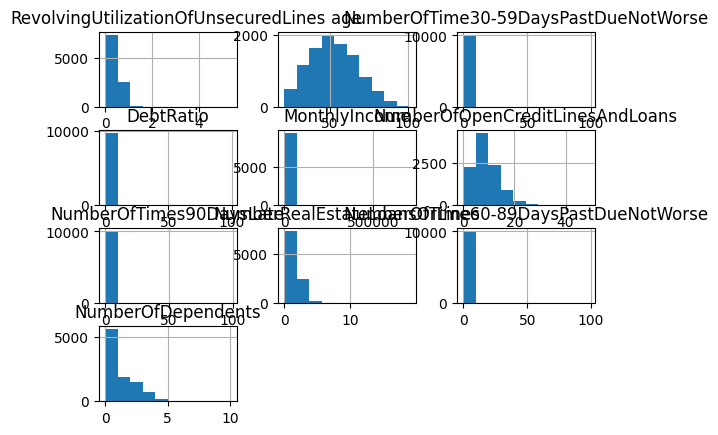

In [15]:
X_train.hist()

array([[<Axes: title={'center': 'RevolvingUtilizationOfUnsecuredLines'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'NumberOfTime30-59DaysPastDueNotWorse'}>],
       [<Axes: title={'center': 'DebtRatio'}>,
        <Axes: title={'center': 'MonthlyIncome'}>,
        <Axes: title={'center': 'NumberOfOpenCreditLinesAndLoans'}>],
       [<Axes: title={'center': 'NumberOfTimes90DaysLate'}>,
        <Axes: title={'center': 'NumberRealEstateLoansOrLines'}>,
        <Axes: title={'center': 'NumberOfTime60-89DaysPastDueNotWorse'}>],
       [<Axes: title={'center': 'NumberOfDependents'}>, <Axes: >,
        <Axes: >]], dtype=object)

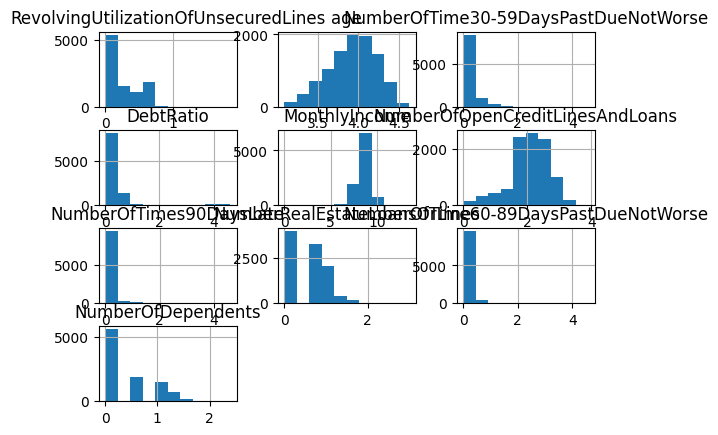

In [16]:
# Aplicación de log1p para intentar normalizar las features
X_train_log = np.log1p(X_train)

# Visualización
X_train_log.hist()

In [17]:
# Aplicación de la transformación a test
X_test_log = np.log1p(X_test)

In [18]:
# Como se implementará un modelo de regresión logística y un KNN es necesario escalar las variables
scaler = StandardScaler()
X_train_log_scaled = pd.DataFrame(scaler.fit_transform(X_train_log), columns= X_train_log.columns, index = X_train_log.index)
X_test_log_scaled = pd.DataFrame(scaler.transform(X_test_log), columns= X_test_log.columns, index = X_test.index)

# Comprobación
X_train_log_scaled.describe()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,1.002900e+04,1.002900e+04,1.002900e+04,1.002900e+04,9.458000e+03,1.002900e+04,1.002900e+04,1.002900e+04,1.002900e+04,9.889000e+03
mean,-2.267162e-17,3.310411e-16,2.940226e-17,2.338011e-17,-2.580582e-16,4.782295e-16,7.793369e-18,-9.210346e-17,4.038382e-17,5.891850e-17
std,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000053e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000051e+00
min,-1.003950e+00,-2.806465e+00,-3.830600e-01,-6.112301e-01,-9.626786e+00,-3.409455e+00,-1.982083e-01,-1.098664e+00,-1.818171e-01,-8.146463e-01
25%,-8.838580e-01,-6.375951e-01,-3.830600e-01,-4.104176e-01,-4.232566e-01,-4.822939e-01,-1.982083e-01,-1.098664e+00,-1.818171e-01,-8.146463e-01
50%,-4.008018e-01,7.875965e-02,-3.830600e-01,-2.143705e-01,7.537420e-02,1.801062e-01,-1.982083e-01,2.663903e-01,-1.818171e-01,-8.146463e-01
75%,8.299153e-01,7.223865e-01,-3.830600e-01,5.692164e-03,5.559127e-01,6.500865e-01,-1.982083e-01,1.064896e+00,-1.818171e-01,4.710238e-01
max,6.318618e+00,2.338533e+00,1.156050e+01,6.323798e+00,5.565870e+00,2.981537e+00,1.560892e+01,4.801002e+00,1.767046e+01,3.633041e+00


In [19]:
# Construcción de modelos
lr = LogisticRegression()
rf_clf = RandomForestClassifier()
knn = KNeighborsClassifier()

In [20]:
model_names = ["Logistic Regression", "Random Forest", "K Nearest Neighbors"]
model_set = [lr, rf_clf, knn]

In [22]:
print("¿Hay NaNs en X_train_log_scaled?")
print(X_train_log_scaled.isna().sum())

¿Hay NaNs en X_train_log_scaled?
RevolvingUtilizationOfUnsecuredLines      0
age                                       0
NumberOfTime30-59DaysPastDueNotWorse      0
DebtRatio                                 0
MonthlyIncome                           571
NumberOfOpenCreditLinesAndLoans           0
NumberOfTimes90DaysLate                   0
NumberRealEstateLoansOrLines              0
NumberOfTime60-89DaysPastDueNotWorse      0
NumberOfDependents                      140
dtype: int64


In [23]:
nan_cols = X_train_log_scaled.columns[X_train_log_scaled.isna().any()]
print("Columnas con NaNs:", nan_cols)

Columnas con NaNs: Index(['MonthlyIncome', 'NumberOfDependents'], dtype='object')


In [ ]:
X_train_log_scaled.fillna(X_train_log_scaled.mode(), inplace=True)
X_test_log_scaled.fillna(X_train_log_scaled.mode(), inplace=True)

In [28]:
# Comparación con validación cruzada
metricas_cv = {}
valores = []

for nombre, modelo in zip(model_names, model_set):
    print(modelo)
    metricas_cv[nombre] = cross_val_score(modelo, X_train_log_scaled, y_train, cv = 5, scoring = "recall_macro")
    valores.append(np.mean(metricas_cv[nombre]))

ganador = list(metricas_cv.keys())[np.argmax(valores)]

LogisticRegression()
RandomForestClassifier()
KNeighborsClassifier()


In [27]:
ganador

'Random Forest'

In [29]:
# Re-entreno con equilibrado
from imblearn.over_sampling import SMOTE

# Aplicar SMOTE SOLO sobre el conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_log_scaled, y_train)

# Confirmamos que el balanceo ha funcionado
print(y_train_bal.value_counts())

# Repetir la comparación de modelos ahora sobre los datos balanceados
metricas_cv = {}
valores = []

for nombre, modelo in zip(model_names, model_set):
    print(modelo)
    metricas_cv[nombre] = cross_val_score(modelo, X_train_log_scaled, y_train, cv = 5, scoring = "recall_macro")
    valores.append(np.mean(metricas_cv[nombre]))

ganador = list(metricas_cv.keys())[np.argmax(valores)]

print(ganador)

SeriousDlqin2yrs
0    9328
1    9328
Name: count, dtype: int64
LogisticRegression()
RandomForestClassifier()
KNeighborsClassifier()
K Nearest Neighbors


              precision    recall  f1-score   support

  No default       0.96      0.84      0.90      2345
     Default       0.19      0.54      0.28       163

    accuracy                           0.82      2508
   macro avg       0.58      0.69      0.59      2508
weighted avg       0.91      0.82      0.86      2508



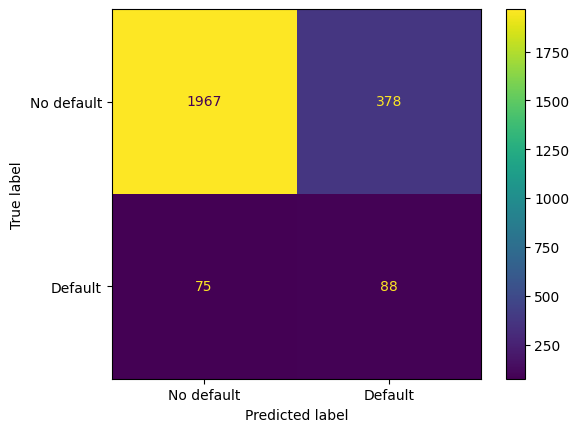

In [30]:
# Entrenamiento del mejor modelo
mejor_modelo = KNeighborsClassifier()
mejor_modelo.fit(X_train_bal, y_train_bal)

# Predicciones
y_pred = mejor_modelo.predict(X_test_log_scaled)

# Reporte final
print(classification_report(y_test, y_pred, target_names=['No default', 'Default']))

# Matriz de confusión
ConfusionMatrixDisplay.from_estimator(mejor_modelo, X_test_log_scaled, y_test, display_labels=['No default', 'Default'])

### Análisis de errores

El modelo logra mejorar la capacidad de detección de la clase minoritaria ('Default'), elevando el recall de 0.28 (sin SMOTE) a 0.54 (con SMOTE).

Sin embargo, el modelo también incrementa los falsos positivos en la clase mayoritaria ('No default'), pasando de 0 a 378.

La clase minoritaria aún presenta un recall más bajo que la mayoría, pero ahora está mucho más equilibrado (macro avg 0.69).